In [18]:
!pip install pillow

In [19]:
!pip install opencv-python

# 데이터 종류 및 개수 확인

## 1. 기존 데이터셋 확인 

In [42]:
from PIL import Image
import matplotlib.pylab as plt

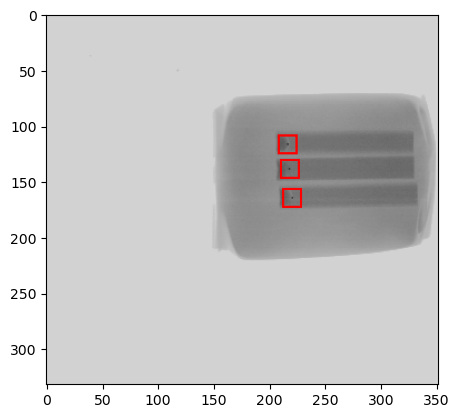

In [43]:
i = Image.open('C:/test1/yolov3/X선이물검출기(06.23_09.22)/1호기(2020.09.22)/SN77128_20200622_NgImage/002_20200622_203053(2).bmp')
 # 진짜...이거 시작부터 눈이 박살나는 구
plt.imshow(i)
plt.show()

## 2. 데이터셋 재정리

진짜 여기서 얼마를 소비한거냐.....

In [44]:
import os
import shutil

# 원본 폴더의 기본 경로
source_base_dir = 'C:/test1/yolov3/X선이물검출기(06.23_09.22)'
# 대상 폴더의 기본 경로
target_base_dir = 'C:/test1/yolov3/X선이물검출기'

# 원본 디렉토리 내 모든 '호기' 디렉토리를 순회
for folder_name in os.listdir(source_base_dir):
    if '호기' in folder_name:  # '호기'가 포함된 폴더만 선택
        source_dir = os.path.join(source_base_dir, folder_name)
        target_dir = os.path.join(target_base_dir, folder_name.split('(')[0])  # 괄호 앞의 'n호기'만 사용

        # 대상 폴더가 존재하지 않는 경우 생성
        os.makedirs(target_dir, exist_ok=True)

        # 원본 폴더와 모든 서브디렉토리를 순회하며 .bmp 파일을 찾아서 복사
        for root, dirs, files in os.walk(source_dir):
            for file_name in files:
                if file_name.endswith('.bmp'):
                    source_file = os.path.join(root, file_name)
                    target_file = os.path.join(target_dir, file_name)
                    shutil.copy(source_file, target_file)

print("모든 .bmp 파일이 성공적으로 복사되었습니다.")


OSError: [Errno 22] Invalid argument: 'C:/test1/yolov3/X선이물검출기\\1호기\\002_20200622_203053(2).bmp'

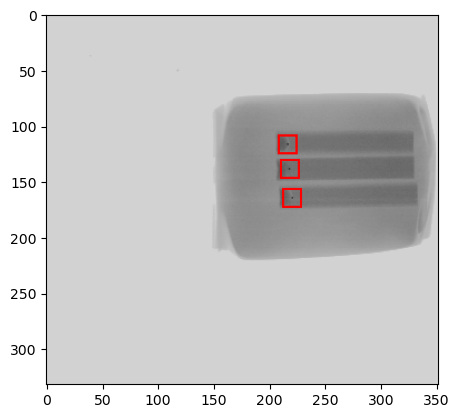

In [23]:
im = Image.open('C:/test1/yolov3/X선이물검출기/1호기/002_20200622_203053(2).bmp')

plt.imshow(im)
plt.show()

# [단계 ③] 데이터 정제(전처리)

In [24]:
# labeling tool을 실행합니다.
# (로컫디스크 C에 Labeling tool폴더를 옮겨놓으셔야 합니다.)
# "C:/OpenLabeling-masterwmainWinput"경로에 라벧링할 이미지들을 옮겨 놓습니다.
!python C:/OpenLabeling-master/main/main.py

-> Please ignore this error message

Showing image 0/14, path: input\002_20200622_203053(2).bmp
Welcome!
 Press [h] for help.


1호기에 1~15번까지 데이터를 복사해서 input 폴더에 옮겨두었습니다.

# [단계 ④] 데이터 특성 파악

## 1. 라벨링된 이미지 데이터 확인 및 라벨 관련 좌표 확인

- 라벨링 작업을 수행한 후 기존 이미지 파일과 라벨링 작업을 통해 구한 좌표 텍스트 파일은 다음과 같다.

- 상단은 원본 이미지의 일부로 [OpenLabeling-master > main > input] 폴더에 위치하고, 
하단은 라벨링 좌표(x, y, h, w)가 포함된 텍스트 파일로 [OpenLabeling-master > main > output > YOLO_darknet] 폴더에 위치한다.

## 2. 라벨링 결과물 이동 및 확장자 변환하기

In [25]:
%cd C:/test1/yolov3/images
!ren *.* *.jpg*

C:\test1\yolov3\images


다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다.
다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다.


# [단계 ⑤] 학습/평가 데이터 분리

## 1. 학습 및 평가 데이터 구분

In [26]:
%cd C:/test1/yolov3/images

C:\test1\yolov3\images


In [27]:
import random
import os
import subprocess
import sys

In [28]:
def split_data_set(image_dir):

    f_val = open("test.text", 'w')
    f_train = open("test.train", 'w')

    path, dirs, files = next(os.walk(image_dir))
    data_size = len(files)

    ind =0
    data_test_size = int(0.2 * data_size)
    test_array = random.sample(range(data_size), k=data_test_size)

    for f in os.listdir(image_dir):
        if(f.split('.jp')[1] == 'g'):
            ind +=1

            if ind in test_array:
                f_val.write(image_dir+'/'+f+'Wn')
            else:
                f_train.write(image_dir+'/'+f+'wn')

In [29]:
image_dir="C:/test1/yolov3/images"

In [30]:
import os
import random

def split_data_set(image_dir):
    # 테스트 세트를 저장할 파일을 'test.txt'로, 훈련 세트를 저장할 파일을 'train.txt'로 엽니다.
    f_val = open("test.txt", 'w')
    f_train = open("train.txt", 'w')

    # 지정된 디렉토리에서 파일 목록을 가져옵니다.
    path, dirs, files = next(os.walk(image_dir))
    data_size = len(files)  # 전체 데이터 크기를 계산합니다.

    ind = 0
    data_test_size = int(0.2 * data_size)  # 전체 데이터의 20%를 테스트 세트 크기로 설정합니다.
    test_array = random.sample(range(data_size), k=data_test_size)  # 테스트 세트에 사용할 파일 인덱스를 무작위로 선택합니다.

    # 디렉토리 내의 모든 파일을 순회합니다.
    for f in os.listdir(image_dir):
        if f.endswith('.jpg'):  # 파일 확장자가 .jpg인 경우만 처리합니다.
            ind += 1

            # 파일 인덱스가 테스트 배열에 포함되어 있으면 테스트 세트로, 그렇지 않으면 훈련 세트로 분류합니다.
            if ind in test_array:
                f_val.write(image_dir + '/' + f + '\n')  # 테스트 세트 파일에 이미지 경로를 기록합니다.
            else:
                f_train.write(image_dir + '/' + f + '\n')  # 훈련 세트 파일에 이미지 경로를 기록합니다.

    # 파일을 닫아 리소스를 해제합니다.
    f_val.close()
    f_train.close()

In [31]:
split_data_set(image_dir)

# [단계 ⑥] 모델 구축

## 1. 모델 학습 수행을 위한 준비

In [32]:
classes= 1
train= 'C:/test1/yolov3/images/train.txt'
valid= 'C:/test1/yolov3/images/valid.txt'
names= 'C:/test1/yolov3/data/classes.names'

defect 로 되어있는지 다시 확인!

In [33]:
!pip install -r C:/test1/yolov3/requirements.txt

# [단계 ⑦] 모델 훈련

## 1. 모델 학습 수행

In [34]:
import os
print(os.getcwd())

C:\test1\yolov3\images


In [35]:
os.chdir('C:/test1/yolov3/')

In [36]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [37]:
!pip install tensorboard

In [40]:
!python train.py --epochs 15 --weights weights/last.pt --batch-size 3 --cfg yolov3-spp.cfg --data custom.data --nosave --device cpu

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(epochs=15, batch_size=3, cfg='yolov3-spp.cfg', data='custom.data', multi_scale=False, img_size=[320, 640], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=False, weights='weights/last.pt', name='', device='cpu', adam=False, single_cls=False, freeze_layers=False)
Using CPU

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
weights/last.pt has been trained for 890 epochs. Fine-tuning for 15 additional epochs.
Image sizes 320 - 640 train, 640 test
Using 3 dataloader workers
Starting training for 905 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for f


  0%|          | 0/12 [00:00<?, ?it/s]
Caching labels C:\test1\yolov3\train.txt (12 found, 0 missing, 0 empty, 0 duplicate, for 12 images): 100%|##########| 12/12 [00:00<00:00, 6102.29it/s]

  0%|          | 0/3 [00:00<?, ?it/s]
Caching labels C:\test1\yolov3\test.txt (3 found, 0 missing, 0 empty, 0 duplicate, for 3 images): 100%|##########| 3/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]C:\Users\untjr\anaconda3\lib\site-packages\torch\cuda\memory.py:391: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(

   891/904        0G     0.874    0.0189         0     0.893         4       640:   0%|          | 0/4 [00:07<?, ?it/s]
   891/904        0G     0.874    0.0189         0     0.893         4       640:  25%|##5       | 1/4 [00:07<00:21,  7.15s/it]
   891/904        0G     0.688    0.0165         0     0.704         3       640:  25%|##5       | 1/4 [00:12<00:21,  7.15s/it]
   891/904        0G     0.688    0.0165      

Errors or warnings during training:

  0%|          | 0/12 [00:00<?, ?it/s]
Caching labels C:\test1\yolov3\train.txt (12 found, 0 missing, 0 empty, 0 duplicate, for 12 images): 100%|##########| 12/12 [00:00<00:00, 5931.84it/s]

  0%|          | 0/3 [00:00<?, ?it/s]
Caching labels C:\test1\yolov3\test.txt (3 found, 0 missing, 0 empty, 0 duplicate, for 3 images): 100%|##########| 3/3 [00:00<00:00, 3003.08it/s]

  0%|          | 0/4 [00:00<?, ?it/s]C:\Users\untjr\anaconda3\lib\site-packages\torch\cuda\memory.py:391: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(

   863/876        0G     0.913    0.0188         0     0.931         4       640:   0%|          | 0/4 [00:06<?, ?it/s]
   863/876        0G     0.913    0.0188         0     0.931         4       640:  25%|##5       | 1/4 [00:06<00:20,  6.76s/it]
   863/876        0G     0.727    0.0164         0     0.743         3       640:  25%|##5       | 1/4 [00:12<00:20,  6.76s/it]


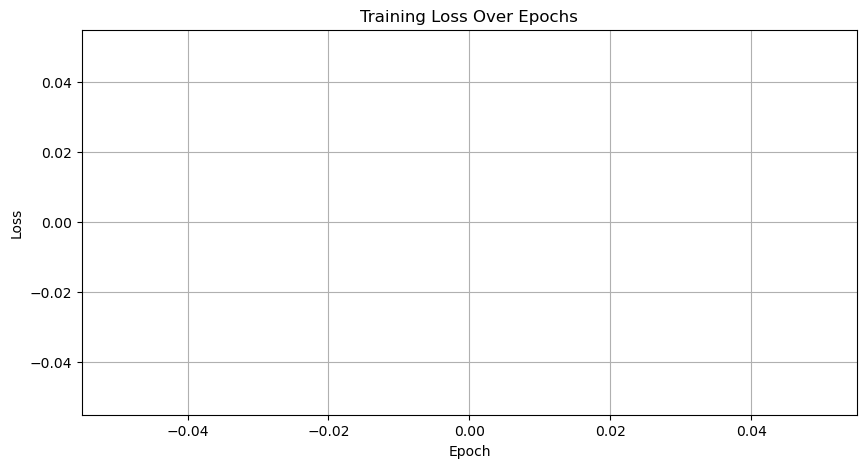

In [37]:
import subprocess
import re
import matplotlib.pyplot as plt

# Corrected training command
command = "python train.py --epochs 15 --weights weights/last.pt --batch-size 3 --cfg yolov3-spp.cfg --data custom.data --nosave --device cpu"

# Run the training process and capture the output
process = subprocess.run(command, shell=True, capture_output=True, text=True)

# Save the stdout and stderr in separate variables
log_data = process.stdout
error_output = process.stderr

# Print error messages if there are any
if error_output:
    print("Errors or warnings during training:")
    print(error_output)

# Extract loss values using regex from the log_data
loss_pattern = re.compile(r"(\d+)/(\d+).*?total: (\d+\.\d+).*")
loss_values = [float(m.group(3)) for m in loss_pattern.finditer(log_data)]

# Extract the epoch numbers
epoch_numbers = [int(m.group(1)) for m in loss_pattern.finditer(log_data)]

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(epoch_numbers, loss_values, marker='o', linestyle='-', color='blue')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# [단계 ⑧] 결과 분석 및 해석

## 1. 객체 탐지 수행

In [38]:
!python detect.py --weights weights/last.pt --source images --cfg yolov3-spp.cfg --names classes.names --output result --device cpu

Namespace(cfg='yolov3-spp.cfg', names='classes.names', weights='weights/last.pt', source='images', output='result', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='cpu', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/15 images\001_20200622_203312(6).jpg: 416x512 Done. (0.404s)
image 2/15 images\001_20200623_003516(8).jpg: 416x512 Done. (0.395s)
image 3/15 images\001_20200901_003429(1).jpg: 416x512 Done. (0.386s)
image 4/15 images\001_20200922_163329(0).jpg: 416x512 Done. (0.386s)
image 5/15 images\001_20200922_163332(2).jpg: 416x512 Done. (0.396s)
image 6/15 images\002_20200714_043029(1).jpg: 512x512 1 defects, Done. (0.559s)
image 7/15 images\002_20200715_042416(9).jpg: 512x512 Done. (0.500s)
image 8/15 images\002_20200831_083545(0).jpg: 512x512 Done. (0.479s)
image 9/15 images\002_20200831_123134(5).jpg: 512x512 Done. (0.466s)
i

C:\Users\untjr\anaconda3\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


## 2. 모델 성능 평가

In [41]:
!python test.py --cfg yolov3-spp.cfg --batch-size 3 --data custom.data --weights weights/last.pt --device cpu

Namespace(cfg='yolov3-spp.cfg', data='custom.data', weights='weights/last.pt', batch_size=3, img_size=512, conf_thres=0.001, iou_thres=0.6, save_json=False, task='test', device='cpu', single_cls=False, augment=False)
Using CPU

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.25465e+07 parameters, 6.25465e+07 gradients
                 all         3         5     0.842         1     0.995     0.914
Speed: 577.7/7.7/585.4 ms inference/NMS/total per 512x512 image at batch-size 3



  0%|          | 0/3 [00:00<?, ?it/s]
Caching labels C:\test1\yolov3\test.txt (3 found, 0 missing, 0 empty, 0 duplicate, for 3 images): 100%|##########| 3/3 [00:00<00:00, 1504.23it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1 [00:00<?, ?it/s]C:\Users\untjr\anaconda3\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|##########| 1/1 [00:04<00:00,  4.43s/it]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|##########| 1/1 [00:05<00:00,  5.01s/it]
C:\test1\yolov3\test.py:228: DeprecationWarning: Conversion of an array with ndim > 0 to a s